In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/AI project dataset (1).csv')

df.drop(df.index[1000:1002], inplace=True)
df

,Age,Sex,Housing,Saving accounts,Duration,Job,Marital status,Spouse - Salary,House Loan,Rent amount,Salary,Credit amount,Sector,Target
0,67,male,own,NaN,6,management,married,156646.4,406597.5,0.0,101348.88,1196000,Government,0
1,22,female,own,little,48,technician,single,0.0,1293502.5,0.0,112542.58,5951000,Government,0
2,49,male,own,little,12,entrepreneur,married,127397.4,135000.0,0.0,113931.57,2029000,Private,1
3,45,male,free,little,42,blue-collar,married,145672.3,312682.5,0.0,93826.63,7882000,Government,1
4,53,male,free,little,24,White-Collar,single,0.0,513000.0,0.0,79084.10,4870000,Private,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,own,little,12,blue-collar,married,118971.6,495985.5,0.0,83912.24,1736000,Private,1
996,40,male,own,little,30,admin.,married,128841.6,1113840.0,0.0,78439.73,3857000,Government,0
997,38,male,own,little,12,blue-collar,married,127219.7,517536.0,0.0,6776.92,804000,Private,0
998,23,male,free,little,45,services,married,141342.4,1288350.0,0.0,9903.42,1845000,Government,0


In [ ]:
#df.drop(['Unnamed: 14','Unnamed: 13'],axis='columns' ,inplace=True)


In [ ]:
print(df.isnull().sum())

Age                  0
Sex                  0
Housing              0
Saving accounts    183
Duration             0
Job                  0
Marital status       0
Spouse - Salary      0
House Loan           0
Rent  amount         0
Salary               0
Credit amount        0
Sector              23
Target               0
dtype: int64


In [ ]:
num= df.select_dtypes(include='number')
num

,Age,Duration,Spouse - Salary,House Loan,Rent amount,Salary,Credit amount,Target
0,67,6,156646.4,406597.5,0.0,101348.88,1196000,0
1,22,48,0.0,1293502.5,0.0,112542.58,5951000,0
2,49,12,127397.4,135000.0,0.0,113931.57,2029000,1
3,45,42,145672.3,312682.5,0.0,93826.63,7882000,1
4,53,24,0.0,513000.0,0.0,79084.10,4870000,1
...,...,...,...,...,...,...,...,...
995,31,12,118971.6,495985.5,0.0,83912.24,1736000,1
996,40,30,128841.6,1113840.0,0.0,78439.73,3857000,0
997,38,12,127219.7,517536.0,0.0,6776.92,804000,0
998,23,45,141342.4,1288350.0,0.0,9903.42,1845000,0


In [ ]:
catg=df.select_dtypes("object")
catg

,Sex,Housing,Saving accounts,Job,Marital status,Sector
0,male,own,NaN,management,married,Government
1,female,own,little,technician,single,Government
2,male,own,little,entrepreneur,married,Private
3,male,free,little,blue-collar,married,Government
4,male,free,little,White-Collar,single,Private
...,...,...,...,...,...,...
995,female,own,little,blue-collar,married,Private
996,male,own,little,admin.,married,Government
997,male,own,little,blue-collar,married,Private
998,male,free,little,services,married,Government


In [ ]:
print(catg.isnull().sum())

Sex                  0
Housing              0
Saving accounts    183
Job                  0
Marital status       0
Sector              23
dtype: int64


In [ ]:
newcatg=catg.fillna('empty')
newcatg

,Sex,Housing,Saving accounts,Job,Marital status,Sector
0,male,own,empty,management,married,Government
1,female,own,little,technician,single,Government
2,male,own,little,entrepreneur,married,Private
3,male,free,little,blue-collar,married,Government
4,male,free,little,White-Collar,single,Private
...,...,...,...,...,...,...
995,female,own,little,blue-collar,married,Private
996,male,own,little,admin.,married,Government
997,male,own,little,blue-collar,married,Private
998,male,free,little,services,married,Government


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
#catg["Marital status"].unique()
newcatg["Job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'White-Collar', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
enc=OrdinalEncoder()
Maritalstatus=['single', 'divorced', 'married']
enc=OrdinalEncoder(categories=[Maritalstatus])
enc.fit_transform(newcatg[["Marital status"]])
newcatg[["Marital status"]]=enc.fit_transform(newcatg[["Marital status"]])


In [ ]:
enc=OrdinalEncoder()
sex=['male', 'female']
enc=OrdinalEncoder(categories=[sex])
enc.fit_transform(newcatg[["Sex"]])
newcatg[["Sex"]]=enc.fit_transform(newcatg[["Sex"]])

In [ ]:
enc=OrdinalEncoder()
Savingaccounts=['empty','little', 'moderate','quite rich', 'rich']
enc=OrdinalEncoder(categories=[Savingaccounts])
enc.fit_transform(newcatg[["Saving accounts"]])
newcatg[["Saving accounts"]]=enc.fit_transform(newcatg[["Saving accounts"]])

In [ ]:
enc=OrdinalEncoder()
job=  ['unemployed','housemaid','entrepreneur','self-employed','services','technician','blue-collar', 'White-Collar','management','admin.', 'retired','student']
enc=OrdinalEncoder(categories=[job])
enc.fit_transform(newcatg[["Job"]])
newcatg[["Job"]]=enc.fit_transform(newcatg[["Job"]])

In [ ]:
enc=OrdinalEncoder()
sector=  ['empty','Private','Government']
enc=OrdinalEncoder(categories=[sector])
enc.fit_transform(newcatg[["Sector"]])
newcatg[["Sector"]]=enc.fit_transform(newcatg[["Sector"]])

In [ ]:
enc=OrdinalEncoder()
housing=  ['rent','free','own']
enc=OrdinalEncoder(categories=[housing])
enc.fit_transform(newcatg[["Housing"]])
newcatg[["Housing"]]=enc.fit_transform(newcatg[["Housing"]])

In [ ]:
newcatg

,Sex,Housing,Saving accounts,Job,Marital status,Sector
0,0.0,2.0,0.0,8.0,2.0,2.0
1,1.0,2.0,1.0,5.0,0.0,2.0
2,0.0,2.0,1.0,2.0,2.0,1.0
3,0.0,1.0,1.0,6.0,2.0,2.0
4,0.0,1.0,1.0,7.0,0.0,1.0
...,...,...,...,...,...,...
995,1.0,2.0,1.0,6.0,2.0,1.0
996,0.0,2.0,1.0,9.0,2.0,2.0
997,0.0,2.0,1.0,6.0,2.0,1.0
998,0.0,1.0,1.0,4.0,2.0,2.0


In [ ]:
df1=num.join(newcatg)
df1

,Age,Duration,Spouse - Salary,House Loan,Rent amount,Salary,Credit amount,Target,Sex,Housing,Saving accounts,Job,Marital status,Sector
0,67,6,156646.4,406597.5,0.0,101348.88,1196000,0,0.0,2.0,0.0,8.0,2.0,2.0
1,22,48,0.0,1293502.5,0.0,112542.58,5951000,0,1.0,2.0,1.0,5.0,0.0,2.0
2,49,12,127397.4,135000.0,0.0,113931.57,2029000,1,0.0,2.0,1.0,2.0,2.0,1.0
3,45,42,145672.3,312682.5,0.0,93826.63,7882000,1,0.0,1.0,1.0,6.0,2.0,2.0
4,53,24,0.0,513000.0,0.0,79084.10,4870000,1,0.0,1.0,1.0,7.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,12,118971.6,495985.5,0.0,83912.24,1736000,1,1.0,2.0,1.0,6.0,2.0,1.0
996,40,30,128841.6,1113840.0,0.0,78439.73,3857000,0,0.0,2.0,1.0,9.0,2.0,2.0
997,38,12,127219.7,517536.0,0.0,6776.92,804000,0,0.0,2.0,1.0,6.0,2.0,1.0
998,23,45,141342.4,1288350.0,0.0,9903.42,1845000,0,0.0,1.0,1.0,4.0,2.0,2.0


In [ ]:
print(num.isnull().sum())

Age                0
Duration           0
Spouse - Salary    0
House Loan         0
Rent  amount       0
Salary             0
Credit amount      0
Target             0
dtype: int64


In [ ]:
for column_name in df1.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Age  is :  0
Count of zeros in column  Duration  is :  0
Count of zeros in column  Spouse - Salary  is :  363
Count of zeros in column  House Loan  is :  179
Count of zeros in column  Rent  amount  is :  821
Count of zeros in column  Salary  is :  0
Count of zeros in column  Credit amount  is :  0
Count of zeros in column  Target  is :  257
Count of zeros in column  Sex  is :  0
Count of zeros in column  Housing  is :  0
Count of zeros in column  Saving accounts  is :  0
Count of zeros in column  Job  is :  0
Count of zeros in column  Marital status  is :  0
Count of zeros in column  Sector  is :  0


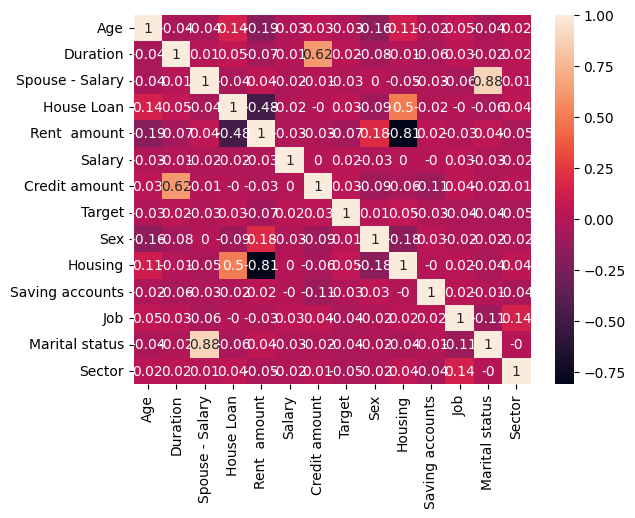

In [ ]:
# Visualizing a Pandas Correlation Matrix Using Seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

matrix = df1.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
df1.drop(['Spouse - Salary','Rent  amount'], inplace=True, axis=1)

In [ ]:
df1

,Age,Duration,House Loan,Salary,Credit amount,Target,Sex,Housing,Saving accounts,Job,Marital status,Sector
0,67,6,406597.5,101348.88,1196000,0,0.0,2.0,0.0,8.0,2.0,2.0
1,22,48,1293502.5,112542.58,5951000,0,1.0,2.0,1.0,5.0,0.0,2.0
2,49,12,135000.0,113931.57,2029000,1,0.0,2.0,1.0,2.0,2.0,1.0
3,45,42,312682.5,93826.63,7882000,1,0.0,1.0,1.0,6.0,2.0,2.0
4,53,24,513000.0,79084.10,4870000,1,0.0,1.0,1.0,7.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,12,495985.5,83912.24,1736000,1,1.0,2.0,1.0,6.0,2.0,1.0
996,40,30,1113840.0,78439.73,3857000,0,0.0,2.0,1.0,9.0,2.0,2.0
997,38,12,517536.0,6776.92,804000,0,0.0,2.0,1.0,6.0,2.0,1.0
998,23,45,1288350.0,9903.42,1845000,0,0.0,1.0,1.0,4.0,2.0,2.0


In [ ]:
# Correlation between all the columns of DataFrame.
df2=df1.corr()
print(df2)

                      Age  Duration  House Loan    Salary  Credit amount  \
Age              1.000000 -0.036136    0.139389 -0.027713       0.032715   
Duration        -0.036136  1.000000    0.051266 -0.013107       0.624988   
House Loan       0.139389  0.051266    1.000000 -0.017292      -0.003005   
Salary          -0.027713 -0.013107   -0.017292  1.000000       0.001444   
Credit amount    0.032715  0.624988   -0.003005  0.001444       1.000000   
Target          -0.028114  0.021089    0.026496  0.017500       0.031786   
Sex             -0.161694 -0.081432   -0.093716 -0.028528      -0.093473   
Housing          0.108437 -0.011950    0.503312  0.003511      -0.056127   
Saving accounts -0.017997 -0.064526   -0.017932 -0.001878      -0.107545   
Job              0.048850  0.029723   -0.001766  0.026119       0.037860   
Marital status  -0.037318 -0.018827   -0.062621 -0.026796      -0.019335   
Sector           0.017766  0.022468    0.043757 -0.022242       0.012448   

           

In [ ]:
df1.columns

Index(['Age', 'Duration', 'House Loan', 'Salary', 'Credit amount', 'Target',
       'Sex', 'Housing', 'Saving accounts', 'Job', 'Marital status', 'Sector'],
      dtype='object')

**PCA**

In [ ]:
df2 = df1.drop('Target',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df2)
scaled_df

array([[ 2.76645648, -1.23647786, -0.18707566, ...,  0.79672228,
         0.70537963,  0.98735146],
       [-1.19140394,  2.24819436,  1.94096036, ..., -0.50724217,
        -1.71444758,  0.98735146],
       [ 1.18331231, -0.73866754, -0.83874552, ..., -1.81120663,
         0.70537963, -0.85472216],
       ...,
       [ 0.21583532, -0.73866754,  0.0791097 , ..., -0.07258735,
         0.70537963, -0.85472216],
       [-1.10345149,  1.9992892 ,  1.92859747, ..., -0.94189699,
         0.70537963,  0.98735146],
       [-0.75164167,  1.9992892 ,  0.46772542, ..., -0.50724217,
        -1.71444758, -0.85472216]])

In [ ]:
scaled_df.mean(axis=0)

array([ 5.32907052e-17,  1.13686838e-16, -3.99680289e-18,  6.39488462e-17,
       -4.44089210e-18, -6.57252031e-17,  2.66453526e-17,  6.39488462e-17,
        9.59232693e-17, -8.17124146e-17,  5.68434189e-17])

In [ ]:
scaled_df -= scaled_df.mean(axis=0)
scaled_df

array([[ 2.76645648, -1.23647786, -0.18707566, ...,  0.79672228,
         0.70537963,  0.98735146],
       [-1.19140394,  2.24819436,  1.94096036, ..., -0.50724217,
        -1.71444758,  0.98735146],
       [ 1.18331231, -0.73866754, -0.83874552, ..., -1.81120663,
         0.70537963, -0.85472216],
       ...,
       [ 0.21583532, -0.73866754,  0.0791097 , ..., -0.07258735,
         0.70537963, -0.85472216],
       [-1.10345149,  1.9992892 ,  1.92859747, ..., -0.94189699,
         0.70537963,  0.98735146],
       [-0.75164167,  1.9992892 ,  0.46772542, ..., -0.50724217,
        -1.71444758, -0.85472216]])

In [ ]:
# Grab Covariance Matrix
covariance_matrix = np.cov(scaled_df, rowvar=False)


In [ ]:
# Get Eigen Vectors and Eigen Values
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [ ]:
# Choose som number of components
num_components=2

In [ ]:
np.argsort(eigen_values)

array([ 2,  3, 10,  9,  8,  7,  6,  5,  4,  1,  0])

In [ ]:
# Get index sorting key based on Eigen Values
sorted_key = np.argsort(eigen_values)[::-1][:num_components]
sorted_key

array([0, 1])

In [ ]:
# Get num_components of Eigen Values and Eigen Vectors
eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

In [ ]:
# Dot product of original data and eigen_vectors are the principal component values
# This is the "projection" step of the original points on to the Principal Component
principal_components=np.dot(scaled_df,eigen_vectors)

In [ ]:
principal_components

array([[-0.27706102,  1.76437423],
       [-2.10388469, -0.59307063],
       [ 0.58206524,  0.70059171],
       ...,
       [ 0.44574879,  1.13519909],
       [-1.21794537, -0.29424967],
       [-1.5918565 , -0.50353541]])

Text(0, 0.5, 'Second Principal Component')

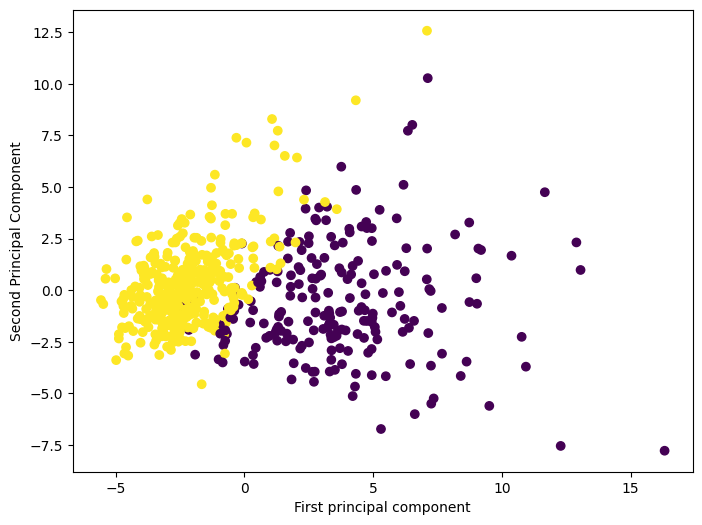

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
labels = df1['Target'].values
# sns.scatterplot(pca_df[:,0],pca_df[:,1],hue=labels,palette='Set1')
# plt.legend(loc=(1.05,0))
sns.scatterplot(x=principal_components[:,0],y=principal_components[:,1],hue=labels,palette='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

**VISUALIZATION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/poverty1.csv")

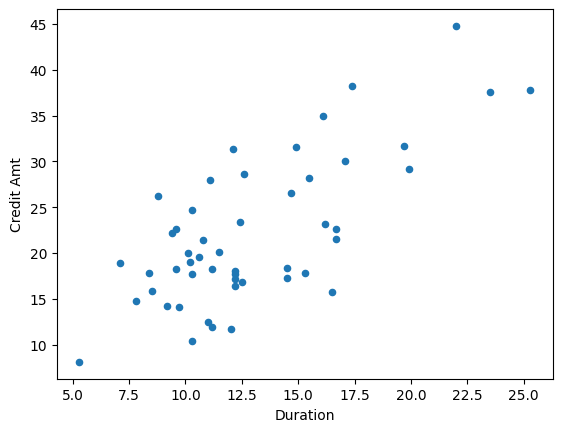

In [ ]:
data.plot(kind='scatter',x='Duration',y='Credit Amt')
plt.show()

<Axes: xlabel='Duration', ylabel='Credit Amt'>

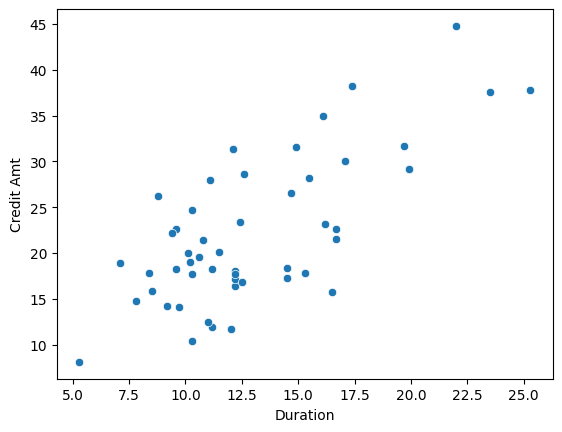

In [ ]:
sns.scatterplot(x='Duration',y='Credit Amt',data=data)

<Axes: xlabel='Duration', ylabel='Credit Amt'>

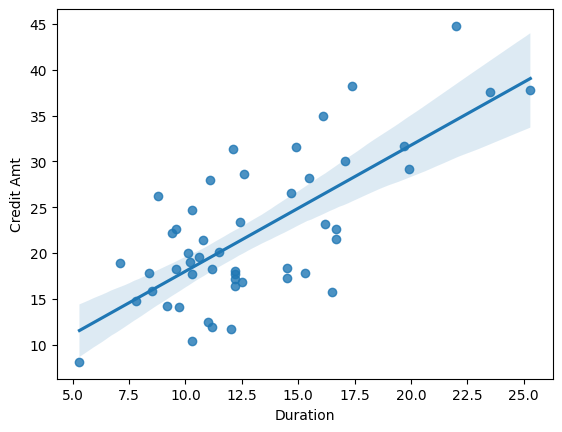

In [ ]:
sns.regplot(x='Duration',y='Credit Amt',data=data)

In [ ]:
X = data['Duration']
y = data['Credit Amt']

In [ ]:
np.polyfit(X,y,1)

array([1.37640441, 4.23502353])

Coefficients: [0.37818008]
Intercept: 4.620976575471079


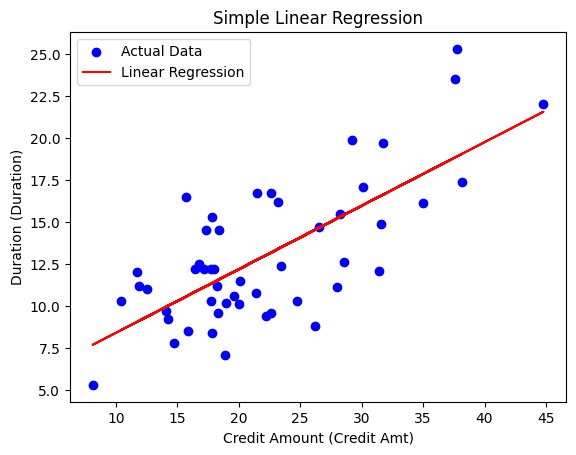

In [ ]:
X = data['Credit Amt'].values.reshape(-1, 1)
y = data['Duration'].values

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the poverty rate using the trained model
y_pred = model.predict(X)

# Print the coefficients and the intercept of the model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Plot the actual data and the regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('Credit Amount (Credit Amt)')
plt.ylabel('Duration (Duration)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [ ]:
df1['Target'].value_counts()

1    743
0    257
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

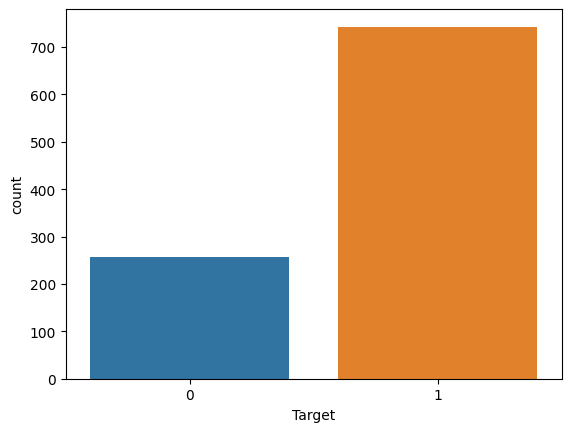

In [ ]:
sns.countplot(data=df1,x='Target')

<Axes: xlabel='Target', ylabel='Salary'>

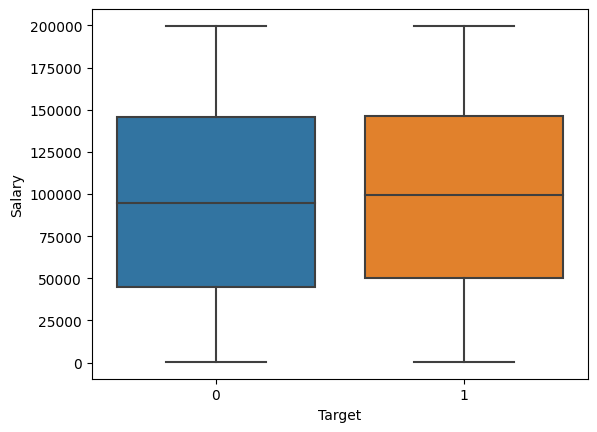

In [ ]:
sns.boxplot(x='Target',y='Salary',data=df1)

<Axes: xlabel='Target', ylabel='Job'>

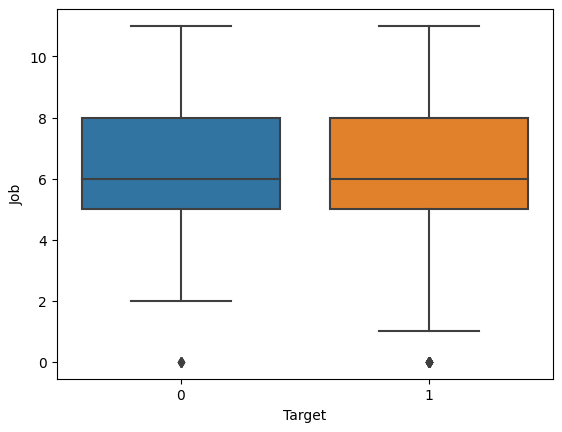

In [ ]:
sns.boxplot(x='Target',y='Job',data=df1)

In [ ]:
X = df1.drop('Target',axis=1)
y = df1['Target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101,penalty='l2')

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**LOGISTIC REGRSSION MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [ ]:
log_model.coef_

array([[-0.08721893, -0.04339378,  0.03139308,  0.01046397,  0.10735484,
         0.04368172,  0.1206582 , -0.05399584, -0.07615286, -0.08806729,
        -0.10524044]])

This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative)
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive)
Based on the ratios with each other, the Sex indicator is a stronger predictor

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.76

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.76      1.00      0.86        76

    accuracy                           0.76       100
   macro avg       0.38      0.50      0.43       100
weighted avg       0.58      0.76      0.66       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine

Splitting Data

In [ ]:
result = df1.head(100)

In [ ]:
result

,Age,Duration,House Loan,Salary,Credit amount,Target,Sex,Housing,Saving accounts,Job,Marital status,Sector
0,67,6,406597.5,101348.88,1196000,0,0.0,2.0,0.0,8.0,2.0,2.0
1,22,48,1293502.5,112542.58,5951000,0,1.0,2.0,1.0,5.0,0.0,2.0
2,49,12,135000.0,113931.57,2029000,1,0.0,2.0,1.0,2.0,2.0,1.0
3,45,42,312682.5,93826.63,7882000,1,0.0,1.0,1.0,6.0,2.0,2.0
4,53,24,513000.0,79084.10,4870000,1,0.0,1.0,1.0,7.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,54,0.0,121277.78,15945000,1,0.0,0.0,1.0,8.0,2.0,2.0
96,61,12,284400.0,64595.25,2012000,1,1.0,2.0,0.0,6.0,2.0,2.0
97,34,18,315000.0,197276.13,2622000,1,0.0,2.0,2.0,10.0,2.0,2.0
98,36,36,900000.0,99645.04,2337000,1,0.0,2.0,1.0,5.0,2.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
X = result.drop('Target',axis=1)
y = result['Target']

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=109)
 # 70% training and 30% test
X_train.shape

(70, 11)

Generating Model

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

Evaluating the Model

In [ ]:
#Accuracy can be computed by comparing actual test set values and predicted values.

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.7
Recall: 1.0


In [ ]:
X_train.describe()

,Age,Duration,House Loan,Salary,Credit amount,Sex,Housing,Saving accounts,Job,Marital status,Sector
count,70.000000,70.000000,7.000000e+01,70.000000,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,39.228571,23.314286,4.566614e+05,96470.566857,3.846171e+06,0.271429,1.500000,1.114286,6.657143,1.457143,1.857143
std,13.243726,14.050162,4.112693e+05,53865.493733,3.245819e+06,0.447907,0.793999,1.000621,2.308684,0.810899,0.352454
min,22.000000,6.000000,0.000000e+00,1643.110000,4.090000e+05,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
25%,28.000000,12.000000,1.406250e+05,48452.262500,1.405250e+06,0.000000,1.000000,1.000000,5.000000,1.000000,2.000000
50%,35.500000,22.000000,3.263805e+05,98849.985000,2.404500e+06,0.000000,2.000000,1.000000,6.000000,2.000000,2.000000
75%,51.000000,36.000000,6.565702e+05,135545.960000,5.782250e+06,1.000000,2.000000,1.000000,8.750000,2.000000,2.000000
max,67.000000,60.000000,1.663988e+06,197276.130000,1.594500e+07,1.000000,2.000000,4.000000,10.000000,2.000000,2.000000


In [ ]:
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1.0 : 0.7000


Visualizing

# Particle Swarm Optimization

In [ ]:
# Import all the modules
import numpy as np
# Importing PySwarms
!pip install pyswarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_contour, plot_surface
from pyswarms.utils.plotters.formatters import Designer
from pyswarms.utils.plotters.formatters import Mesher

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.0 MB/s eta 0:00:00


**Random Forest**

In [ ]:
import pandas as pd
import numpy as np
from numpy import random

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x = df1.drop('Target' , axis = 1)
y = df1['Target']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y)

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

In [ ]:
print ("Accuracy : " , accuracy_score(y_test,prediction)*100)
print("Report : \n", classification_report(y_test, prediction))

print("F1 Score : ",f1_score(y_test, prediction, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,prediction))

Accuracy :  74.8
Report : 
               precision    recall  f1-score   support

           0       0.20      0.02      0.03        60
           1       0.76      0.98      0.86       190

    accuracy                           0.75       250
   macro avg       0.48      0.50      0.44       250
weighted avg       0.62      0.75      0.66       250

F1 Score :  44.297082228116714
Confusion Matrix :
 [[  1  59]
 [  4 186]]


**PSO Optimization for RF**

In [ ]:
def FitnessFunction(ffX , ffY): # LGBM checks accuracies

    ffx_train , ffx_test , ffy_train , ffy_test = train_test_split(ffX ,ffY)
    model = RandomForestClassifier(n_estimators=100)
    model.fit(ffx_train, ffy_train)
    prediction = model.predict(ffx_test)
    accuracy = accuracy_score(ffy_test,prediction)*100

    return accuracy

In [ ]:
patterens = []
accuracies = []

In [ ]:
def population_initialization(): # making intial population
    sX = df1.drop('Target' , axis = 1)
    sY = df1['Target']

    columns = df1.columns
    selected = random.randint(2, size=(56))

    modified_dataset = pd.DataFrame()
    for i in range(56):
        if selected[i] == 1:
            modified_dataset[columns[i]] = sX[columns[i]]
    patterens.append(selected)

    #population_initialization_display(selected)
    return FitnessFunction(modified_dataset , sY)

In [ ]:
def population_initialization_display(selected):
    print("Patteren : " , selected)

In [ ]:
def generation(): # making first generation
    for i in range(60):
        acc = population_initialization()
        accuracies.append(acc)

In [ ]:
def Sorting(accuracies , patterens): # Sorting both accuracies , patterens list
    for i in range(len(accuracies)):
        for j in range(len(accuracies)):
            temp = 0
            if accuracies[i] < accuracies[j]:
                temp = accuracies[i]
                accuracies[i] = accuracies[j]
                accuracies[j] = temp

                temp = 0
                temp = patterens[i]
                patterens[i] = patterens[j]
                patterens[j] = temp

In [ ]:
def velocity(array , updated , Gbest):
    c1 = 0.3
    c2 = 0.7
    r1 = np.random.random(1)
    r2 = np.random.random(1)

    velocity = c1*r1*(updated - array) + c2*r2*(Gbest - array)
    updated = updated + velocity
    return updated

In [ ]:
best_patteren = []
best_accuracy = 0

In [ ]:
terminate_accuracy = 0

In [ ]:
def PSO(accuracies , patterens):

# Step 1: Generating Initial Population & Finding Accuracies
    generation()
    print("Highest Accuracy Patterns And Their Accuracies")
    print("\n\n")

    for i in range(200): # Termination Criteria
    # Step 2: Sorting
        print("\n")
        print(patterens[59] , accuracies[59])
        Sorting(accuracies , patterens)

    # Step 3: Making 2 Duplicates Of Initial Population, Finding Gbest , Updating Positions
        array = patterens
        updated = np.array(patterens)
        gbest = np.array(patterens[59])
        updated = velocity(array , updated , gbest)
        updated_accuracies = []

    # Step 4: Finding Max Values From Each Row Of Updated Population
        maxlist = []
        for i in updated:
            maxvalue = 0
            for j in i:
                if maxvalue < j:
                    maxvalue = j
            maxlist.append(maxvalue)

    # Step 5: Dividing Each Entire Row With Respective Max Value
        for i in range(60):
            for j in range(56):
                updated[i][j] = updated[i][j] / maxlist[i]

    # Step 6: If Value Below 0.5 Converting To Zero Else To 1
        for i in range(60):
            for j in range(56):
                if updated[i][j] < 0.5:
                    updated[i][j] = 0
                elif updated[i][j] >= 0.5:
                    updated[i][j] = 1

    # Step 7: Calculating Updated Populations's Accuracy
        sX = df1.drop('Target' , axis = 1)
        sY = df1['Target']
        columns = df1.columns

        for i in range(60):
            modified_dataset = pd.DataFrame()
            for j in range(56):
                if updated[i][j] == 1:
                    modified_dataset[columns[j]] = sX[columns[j]]
            updated_accuracies.append(FitnessFunction(modified_dataset , sY))

    # Step 8: Comparing Both Population's Particles & Storing Best In Pbest
        pbest = []
        pbest_accuracies = []

        for i in range(60):
            if (accuracies[i] <= updated_accuracies[i]):
                pbest.append(updated[i])
                pbest_accuracies.append(updated_accuracies[i])

            elif (accuracies[i] > updated_accuracies[i]):
                pbest.append(patterens[i])
                pbest_accuracies.append(accuracies[i])

        patterens = pbest
        accuracies = pbest_accuracies

        if i > 20: # Termination Criteria 2
            if terminate_accuracy == accuracies[59]:
                print("Loop Terminated Because Of Continous Similar Results")
                break

        if accuracies[59] == 80: # Termination Criteria 3
            break

        terminate_accuracy == accuracies[59]

    Sorting(accuracies , patterens)
    for i in range(56):
        best_patteren.append(patterens[59][i])
    best_accuracy = accuracies[59]
    print("best_accuracy: ", best_accuracy)

best_accuracy:  0.95


**PSO Optimization for Logistic Regression**

In [ ]:
def FitnessFunction1(ffX , ffY): # LGBM checks accuracies

    ffx_train , ffx_test , ffy_train , ffy_test = train_test_split(ffX ,ffY)
    model = LogisticRegression()
    model.fit(ffx_train, ffy_train)
    prediction = model.predict(ffx_test)
    accuracy = accuracy_score(ffy_test,prediction)*100

    return accuracy

In [ ]:
patterens1 = []
accuracies1 = []
def population_initialization_display(selected):

In [ ]:
def generation(): # making first generation
    for i in range(60):
        acc = population_initialization()
        accuracies1.append(acc)

In [ ]:
def Sorting(accuracies1 , patterens1):

In [ ]:
def velocity(array , updated , Gbest):

In [ ]:
best_patteren = []
best_accuracy = 0
terminate_accuracy = 0

In [ ]:
def PSO(accuracies1 , patterens1):

best_accuracy: 0.87


**PSO Optimization for SVM**

In [ ]:
def FitnessFunction1(ffX , ffY): # LGBM checks accuracies

    ffx_train , ffx_test , ffy_train , ffy_test = train_test_split(ffX ,ffY)
    model = svm.clf()
    model.fit(ffx_train, ffy_train)
    prediction = model.predict(ffx_test)
    accuracy = accuracy_score(ffy_test,prediction)*100

    return accuracy

In [ ]:
patterens2 = []
accuracies2 = []
def population_initialization_display(selected):

In [ ]:
def generation(): # making first generation
    for i in range(60):
        acc = population_initialization()
        accuracies2.append(acc)

In [ ]:
def Sorting(accuracies2 , patterens2):

In [ ]:
def velocity(array , updated , Gbest):

In [ ]:
best_patteren = []
best_accuracy = 0
terminate_accuracy = 0

In [ ]:
def PSO(accuracies1 , patterens1):

best_accuracy: 0.93


**Harmony Search Optimization**

**For SVM**

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Harmony Search parameters
max_iter = 100  # Maximum number of iterations
hms = 10  # Harmony Memory Size
hmcr = 0.8  # Harmony Memory Consideration Rate
par = 0.6  # Pitch Adjustment Rate
X = df1.drop('Target' , axis = 1)
y = df1['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for SVM accuracy
def objective_function(params):
    # Create an SVM classifier with the given parameters
    clf = svm.SVC(C=params[0], gamma=params[1])

    # Train the SVM classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate and return the accuracy
    return accuracy_score(y_test, y_pred)

# Initialize the Harmony Memory
harmony_memory = []
for _ in range(hms):
    C = np.random.uniform(0.1, 10)
    gamma = np.random.uniform(0.001, 1)
    harmony_memory.append([C, gamma])

# Main loop
for iter in range(max_iter):
    # Create a new harmony by randomly selecting values from the harmony memory
    new_harmony = []
    for i in range(len(harmony_memory[0])):
        if np.random.rand() < hmcr:
            # Select a value from the harmony memory
            idx = np.random.randint(0, len(harmony_memory))
            value = harmony_memory[idx][i]

            # Perform pitch adjustment
            if np.random.rand() < par:
                value += np.random.uniform(-0.5, 0.5)

            new_harmony.append(value)
        else:
            # Generate a random value
            if i == 0:
                new_harmony.append(np.random.uniform(0.1, 10))
            else:
                new_harmony.append(np.random.uniform(0.001, 1))

    # Evaluate the new harmony
    new_accuracy = objective_function(new_harmony)

    # Update the harmony memory
    worst_idx = np.argmax([accuracy for harmony, accuracy in harmony_memory])
    if new_accuracy > harmony_memory[worst_idx][1]:
        harmony_memory[worst_idx] = [new_harmony, new_accuracy]

    # Print the best harmony in each iteration
    best_idx = np.argmax([accuracy for harmony, accuracy in harmony_memory])
    best_harmony = harmony_memory[best_idx][0]
    best_accuracy = harmony_memory[best_idx][1]
    print("best_accuracy: ", best_accuracy)

best_accuracy: 0.91
